### Logistic model simulation and analysis

In this problem, you will visualize and simulate the logistic model.

$$ \frac{dp}{dt} = r p - (\delta \, p) p $$

Do the following.

1) Construct a function of the form f(x,t) for the right hand side of this differential equation. I've left some seed code so the argument structure works with my plotting script below.

2) Plot a vector field for this example. I have provided a code for doing this.

3) Write a differential simulation code using the simple Euler method. This should take the i) model, ii) its initial condition, iii) time limits for the simulation, and iv) the number of simulation points in that time interval. This code should simulate the model forward in time. I'm not picky about how you write this, I just want you to write your own (no using packages).

4) Simulate this model from the following initial conditions: $p_0 = 0.1, 1.8, 2.5, 3.0$ and simulate the system from time 0 to 6.0.

5) Plot the time evolution of this system for all four cases on top of the vector field.

6) What can you conclude from this visualization.

In [2]:
using Pkg
Pkg.status()
Pkg.add("Plots")
using LinearAlgebra, Plots, BenchmarkTools

Status `~/.julia/environments/v1.10/Project.toml`


  [0c46a032] DifferentialEquations v7.13.0
  [91a5bcdd] Plots v1.40.4
  [2913bbd2] StatsBase v0.34.3


   Resolving package versions...


  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`


ArgumentError: ArgumentError: Package BenchmarkTools not found in current path.
- Run `import Pkg; Pkg.add("BenchmarkTools")` to install the BenchmarkTools package.

In [3]:
function Logistic_RHS(x, t; r=1.0, δ=1.0)
    return r * x - δ * x^2
end


Logistic_RHS (generic function with 1 method)

In [4]:
using Plots

function plot_vf_1var(plt, tlims, xlims, fun, scale, num_pts)
    tvals = LinRange(tlims[1], tlims[2], num_pts)
    xvals = LinRange(xlims[1], xlims[2], num_pts)

    for t in tvals
        for x in xvals
            der = fun(x, t)
            quiver!(plt, [t], [x], quiver=([1.0*scale], [der*scale]), linecolor=:blue)
        end
    end

    return plt
end


plot_vf_1var (generic function with 1 method)

In [5]:
function Euler_1D(tlims, x0, Npts, fun)
    Δt = (tlims[2] - tlims[1]) / Npts
    tvals = LinRange(tlims[1], tlims[2], Npts)
    xvals = zeros(Npts)

    xvals[1] = x0
    for i in 2:Npts
        xvals[i] = xvals[i-1] + Δt * fun(xvals[i-1], tvals[i-1])
    end

    return tvals, xvals
end


Euler_1D (generic function with 1 method)

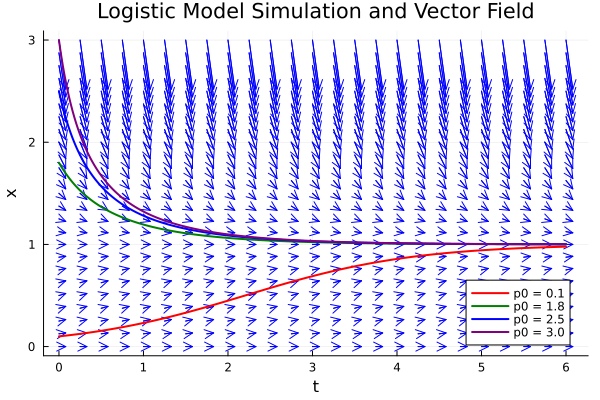

In [6]:
# Initialize the plot with limits and labels
plt = plot(xlabel="t", ylabel="x", title="Logistic Model Simulation and Vector Field", legend=:bottomright)

# Plot vector field
plot_vf_1var(plt, [0.0, 6.0], [0.0, 3.0], (x,t) -> Logistic_RHS(x,t), 0.08, 25)

# Simulation parameters
tlims = [0.0, 6.0]
Nstep = 1000
initial_conditions = [0.1, 1.8, 2.5, 3.0]

# Colors for different trajectories
colors = [:red, :green, :blue, :purple]

for (i, p0) in enumerate(initial_conditions)
    tt, xx = Euler_1D(tlims, p0, Nstep, (x,t) -> Logistic_RHS(x,t))
    plot!(plt, tt, xx, linecolor=colors[i], linewidth=2, label="p0 = $p0")
end

display(plt)


This vector field shows that there are some equlibrium points in low values of x. Starting point influence the trajectory over time. When the start is high, rate to grow decreases. When populations grow rapidly when small, slow down as they approach carrying capacity, and stabilize at carrying capacity. 